# **Car Price Prediction By Using Regression Models**

The predictive power of regression models allows us to estimate a car's price based on essential features like make, model, year, and other parameters. This predictive model is a game-changer for car dealers, customers, and manufacturers, providing invaluable insights into car pricing trends in the market.

By leveraging regression algorithms like LinearRegression, RandomForestRegressor, and Lasso Regression, we unlock the ability to predict car prices based on user inputs such as the car's name, model, and fuel type. These predictions offer a deeper understanding of the dynamic pricing structure within the automotive industry.


**Loading Dataset**

In [2]:
import pandas as pd
# Read dataset into dataframe
# Reading from google drive

from google.colab import drive
drive.mount('/content/drive')
# Change to path in google drive:
%cd '/content/drive/MyDrive/Datasets'

df = pd.read_csv('quikr_car.csv')
df

Mounted at /content/drive
/content/drive/MyDrive/Datasets


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


**Inspecting Data**

In [3]:
# Checks how many null values are in the data frame
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [4]:
# Checks data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


**Data Cleansing and Transformation**

In [5]:
#Copying from original dataframe
car = df.copy()

# Modifying name
car['name']= car['name'].str.split(' ').str.slice(0,3).str.join(' ')

# Converting year to integer
car = car[car['year'].str.isnumeric()]
car['year'] = car['year'].astype(int)

#Filtering prices with a value and converting to Price to float
car = car[car['Price'] != 'Ask For Price']
car['Price'] = car['Price'].str.replace(',','').astype(float)

#Converting kms to integer
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)

#Removing null values
car = car[car['fuel_type'].notnull()]

car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
6,Ford Figo,Ford,2012,175000.0,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000.0,50000,Petrol
885,Tata Indica V2,Tata,2009,110000.0,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000.0,132000,Petrol
888,Tata Zest XM,Tata,2018,260000.0,27000,Diesel


In [93]:
car[(car['name'] == 'Maruti Suzuki Swift') & (car['year'] == 2015)]

,name,company,year,Price,kms_driven,fuel_type
426,Maruti Suzuki Swift,Maruti,2015,220000.0,129000,Diesel
518,Maruti Suzuki Swift,Maruti,2015,250000.0,55000,Petrol
670,Maruti Suzuki Swift,Maruti,2015,475000.0,22000,Petrol
732,Maruti Suzuki Swift,Maruti,2015,475000.0,43000,Diesel
757,Maruti Suzuki Swift,Maruti,2015,425000.0,42000,Diesel


In [6]:
#Verifying data types
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        816 non-null    object 
 1   company     816 non-null    object 
 2   year        816 non-null    int64  
 3   Price       816 non-null    float64
 4   kms_driven  816 non-null    int64  
 5   fuel_type   816 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 44.6+ KB


**Exploratory Data Analysis**

In [7]:
# Import visualization libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**What is the price distribution of the dataset?**

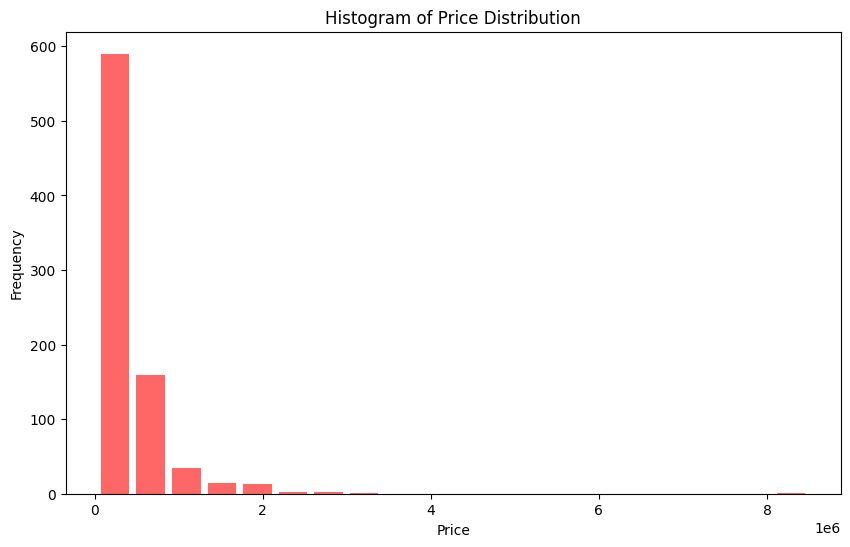

In [8]:
price_col = car[['Price']]

# Create histogram data
hist, bins = np.histogram(price_col, bins=20)

# Create the plot
plt.figure(figsize=(10, 6))

# Calculate bar centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot bars with space between them by adjusting the width
plt.bar(bin_centers, hist, width=(bins[1] - bins[0]) * 0.8, color='red', alpha=0.6)

# Label the axes
plt.xlabel('Price')
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram of Price Distribution')

# Show the plot
plt.show()

**What is the mileage distribution of the dataset?**

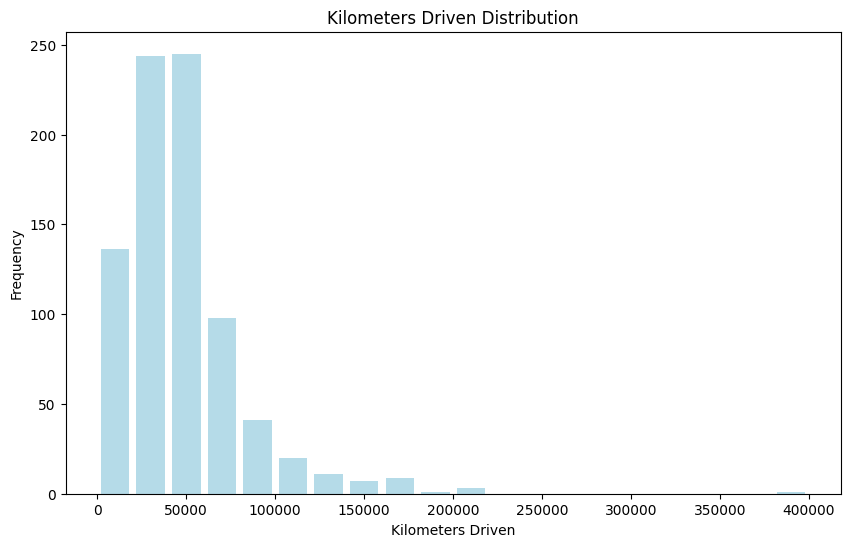

In [24]:
kms_driven_col = car['kms_driven']

# Create histogram data
hist, bins = np.histogram(kms_driven_col, bins=20)

# Create the plot
plt.figure(figsize=(10, 6))

# Calculate bar centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot bars with space between them by adjusting the width
plt.bar(bin_centers, hist, width=(bins[1] - bins[0]) * 0.8, color='lightblue', alpha=0.9)

# Label the axes
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')

# Set the title
plt.title('Kilometers Driven Distribution')

# Show the plot
plt.show()

**What is the most populur fuel type for cars?**

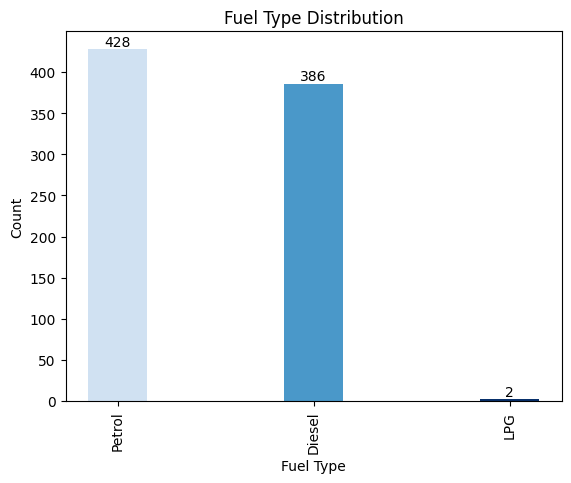

In [10]:
fuel_types = car['fuel_type']
#plt.bar(fuel_types.value_counts().index, fuel_types.value_counts())
# Define darker shades of red for the bars
colors = plt.cm.Blues(np.linspace(0.2, 1, len(fuel_types.value_counts())))

# Plot the bars
bars = plt.bar(fuel_types.value_counts().index, fuel_types.value_counts(),color=colors, width=0.3)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution')
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.show()


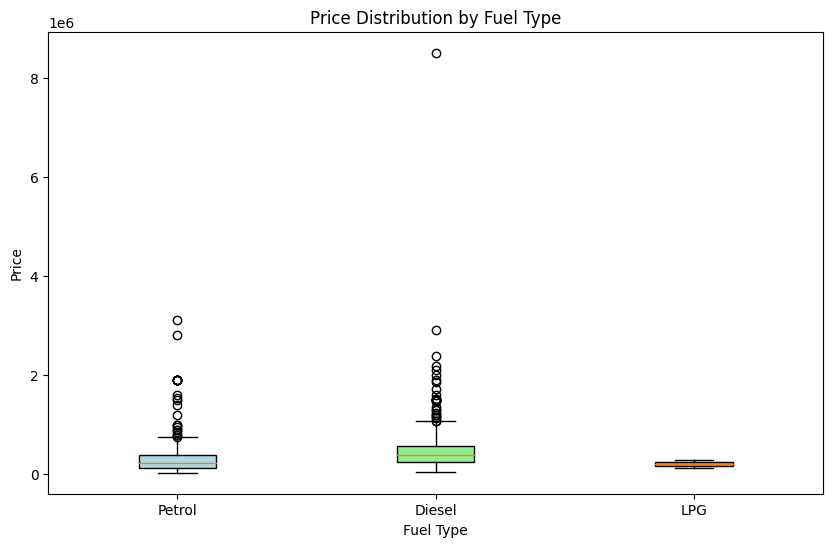

In [11]:
# Group by Fuel_Type
grouped_data = [car[car['fuel_type'] == fuel]['Price'].tolist() for fuel in car['fuel_type'].unique()]

# Create the box plot
plt.figure(figsize=(10, 6))
boxes = plt.boxplot(grouped_data, labels=car['fuel_type'].unique(), patch_artist=True, boxprops=dict(facecolor='lightblue'))


# Define colors for each fuel type
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Assigning colors to the boxes
for box, color in zip(boxes['boxes'], colors):
    box.set_facecolor(color)

# Set labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution by Fuel Type')

# Show the plot
plt.show()

**What is the most popular brand?**

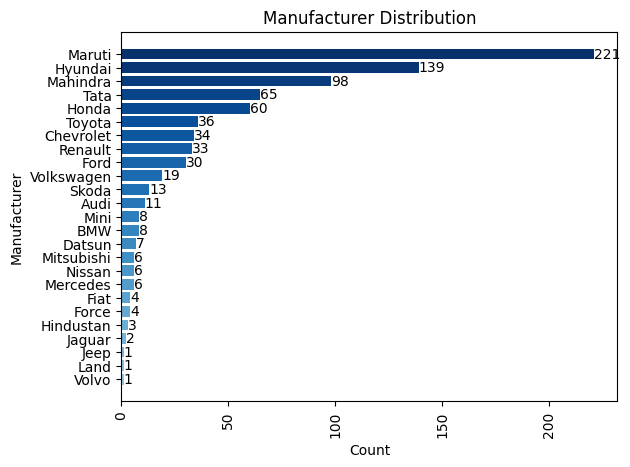

In [12]:
companies = car['company']


# Get the counts of each manufacturer
manufacturer_counts = car['company'].value_counts()

# Sort the manufacturer counts in ascending order
manufacturer_counts = manufacturer_counts.sort_values(ascending=True)

# Define darker shades of blue for the bars
colors = plt.cm.Blues(np.linspace(0.4, 1, len(manufacturer_counts)))
# Plot the bars
bars = plt.barh(manufacturer_counts.index, manufacturer_counts.values,color=colors)
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.title('Manufacturer Distribution')
plt.xticks(rotation=90)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center')
plt.show()

**Prices for the top 3 manufacturers**

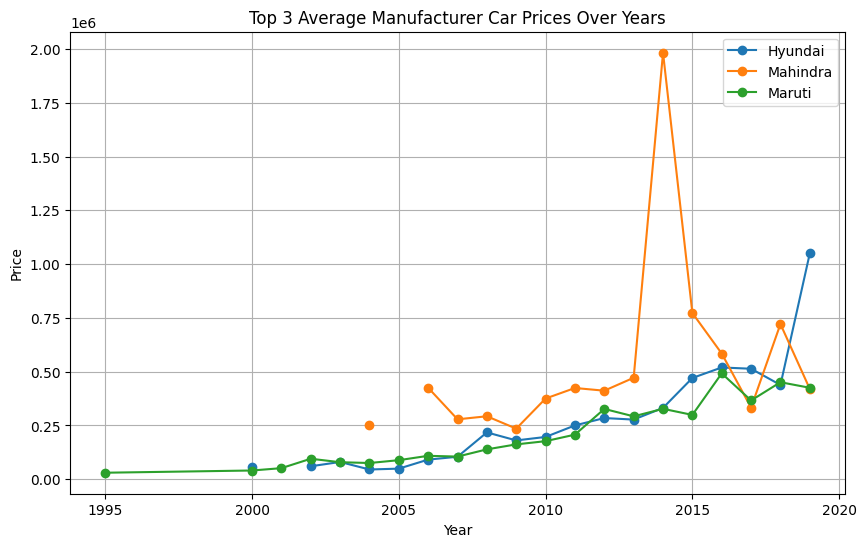

In [13]:
top_3_companies= companies.value_counts().nlargest(3)
company_df = car[car['company'].isin(top_3_companies.index)]
avg= company_df.groupby(['year', 'company'])['Price'].mean().unstack()
# Plot the line graph for each manufacturer
plt.figure(figsize=(10, 6))
for manufacturer in avg.columns:
    plt.plot(avg.index, avg[manufacturer], marker='o', label=manufacturer)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Top 3 Average Manufacturer Car Prices Over Years')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

**What have the prices been over the years?**

Text(0.5, 0.98, 'Car Prices Over Years')

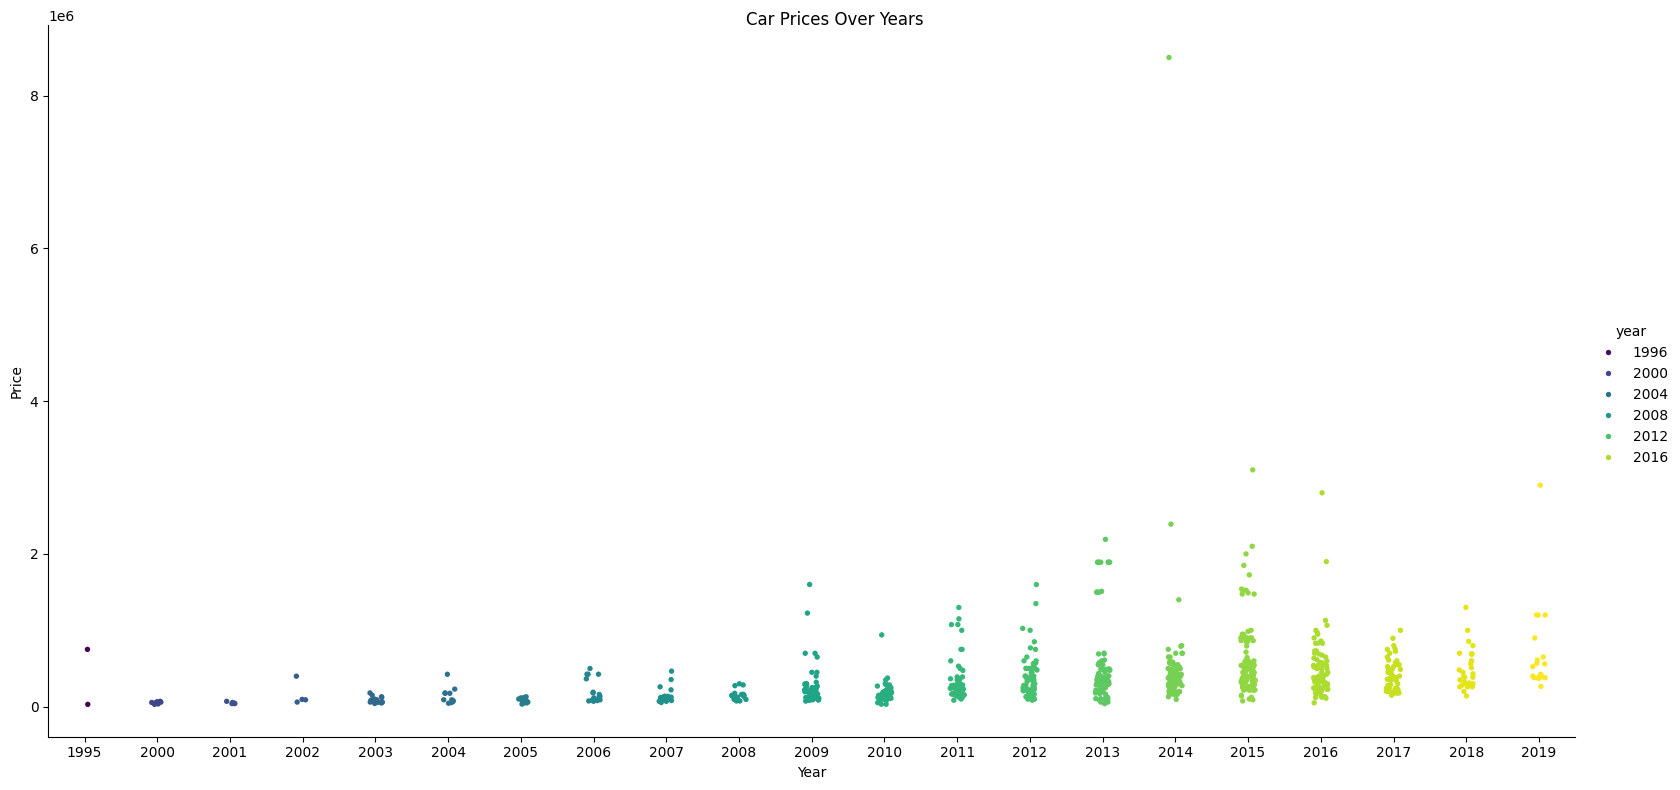

In [14]:
# Create the strip plot with colors for each year
striplt = sns.catplot(x='year', y='Price', data=car, kind='strip', height=8, aspect=2, marker ='o', s=15,  hue='year', palette='viridis')

# Set labels and title
striplt.set_axis_labels('Year', 'Price')
striplt.fig.suptitle('Car Prices Over Years')

**What is the fuel type distribution among the top 5 manufacturers?**

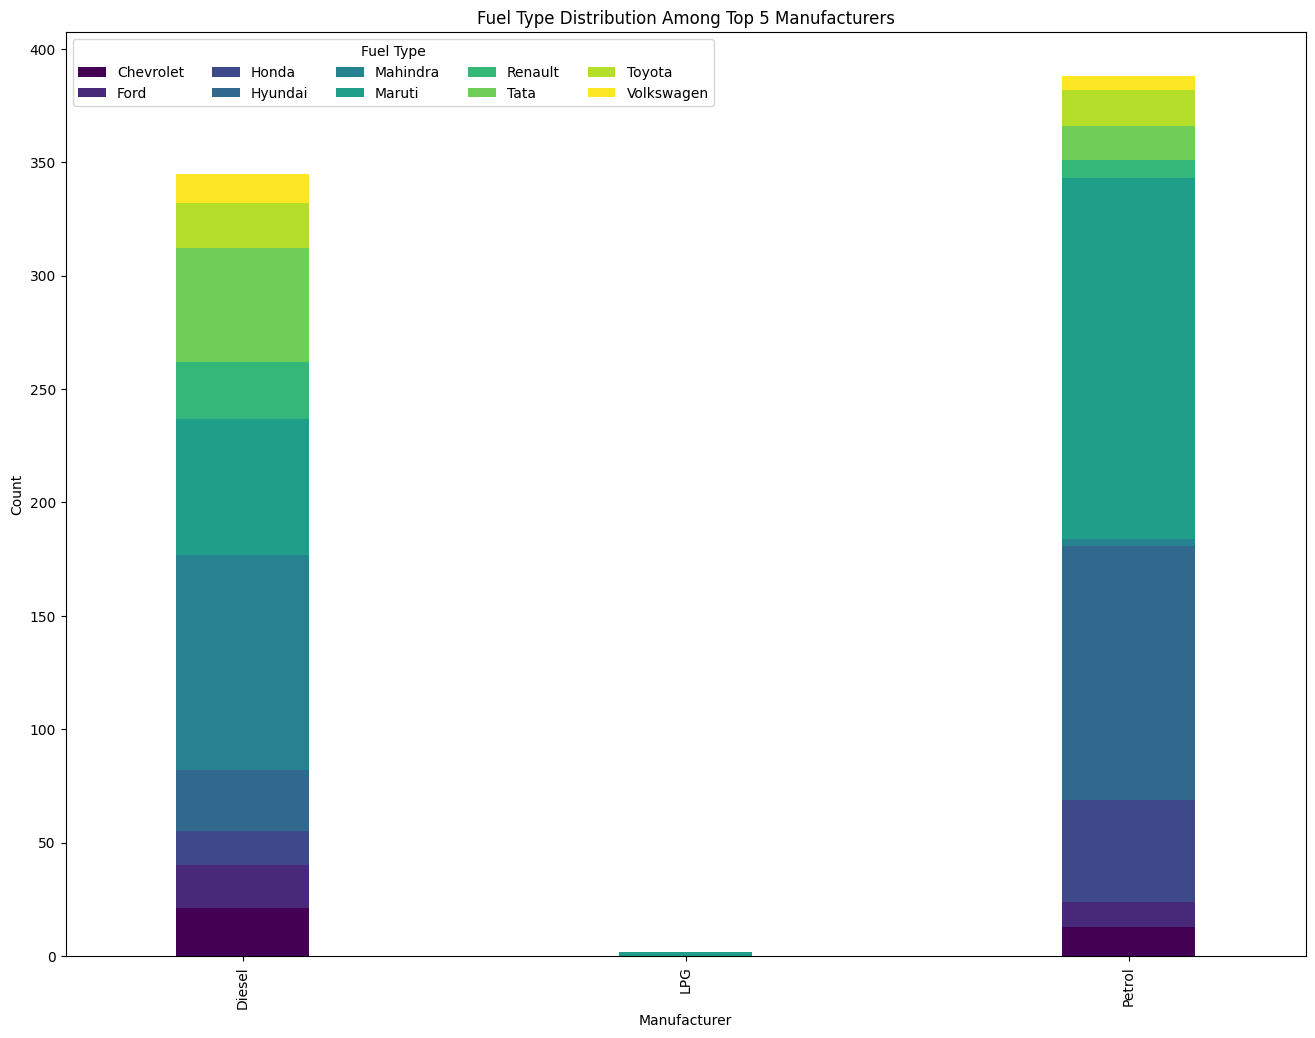

In [15]:
# Get the top 5 manufacturers based on the number of cars
top_5_companies = car['company'].value_counts().nlargest(10).index

# Filter the data for these manufacturers
top_5_data = car[car['company'].isin(top_5_companies)]

# Calculate the distribution of fuel types within these manufacturers
fuel_type_distribution = top_5_data.groupby(['fuel_type','company']).size().unstack().fillna(0)

# Plot the results
ax = fuel_type_distribution.plot(kind='bar', stacked=True, figsize=(16, 12), colormap='viridis', width=0.3)

# Set labels and title
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Fuel Type Distribution Among Top 5 Manufacturers')

# Show legend
plt.legend(title='Fuel Type', loc='upper left',  ncol=5)

# Show the plot
plt.show()

# Show

# Show


# Show the plot
plt.show()

**Which fuel type has the most km driven in 2015?**

<Figure size 1200x800 with 0 Axes>

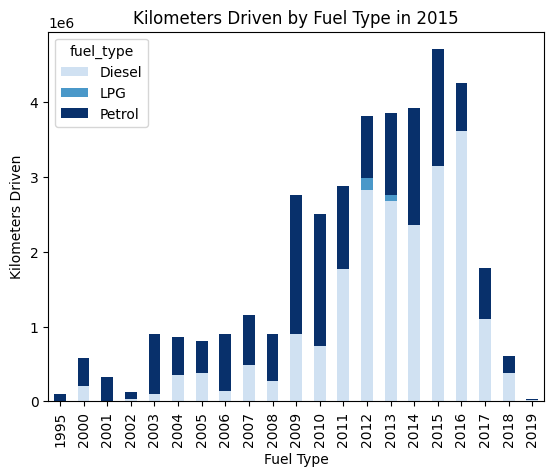

In [29]:
# Filter by 2015 car data
#car_2015 = car[car['year']== 2015]

# Group by fuel type and calculate
km_by_fuel_type = car.groupby(['year','fuel_type'])['kms_driven'].sum().unstack()

colors = plt.cm.Blues(np.linspace(0.2, 1, len(km_by_fuel_type.columns)))

# Plot the results
plt.figure(figsize=(12, 8))
bars = km_by_fuel_type.plot(kind='bar', stacked=True, color=colors)

# Set labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Kilometers Driven')
plt.title('Kilometers Driven by Fuel Type in 2015')



# Show the plot
plt.show()

## **Regression Models**

**Identifying target and splitting test and train datasets**

In [30]:
# Separating features and target
x = car.drop('Price', axis=1)
y = car['Price']

In [31]:
#20/80 Test/Train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

**Encoding Categorical Features (One Hot Encoding)**

In [32]:
#Importing One Hot Encoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder()
encoder.fit(x[['name', 'company', 'fuel_type']])
column_trans = make_column_transformer(
        (OneHotEncoder(categories=encoder.categories_), ['name', 'company', 'fuel_type']),
        remainder='passthrough')

column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                 ['name', 'company', 'fuel_type'])])

**Correlation Matrix**

In [36]:
# Correlation matrix
corr_matrix= car.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix

,year,Price,kms_driven
year,1.000000,0.287193,-0.233695
Price,0.287193,1.000000,-0.120854
kms_driven,-0.233695,-0.120854,1.000000


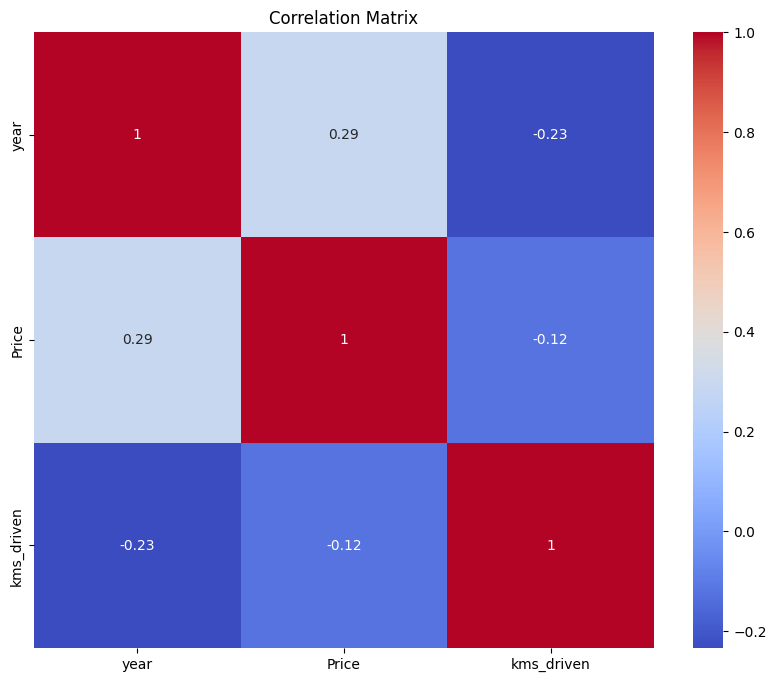

In [39]:
# HeatMap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Linear Regression**

In [47]:
#Import LinearRegression model, pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
model_linear = LinearRegression()
pipe = make_pipeline(column_trans, model_linear)
pipe.fit(x_train, y_train)
y_pred_linear = pipe.predict(x_test)
y_pred_linear

array([ 179386.02285112,  584888.15323665,  112607.94266523,
        755866.55689889,  547053.3037085 ,  514883.42910884,
        524993.00120482,  101307.3596055 ,  518939.08823402,
        296763.5394514 ,   76372.45853827,   44226.98094829,
        119958.32338732,  124122.41076623,  350145.8052109 ,
        642774.46590535,  291784.79588637,   71398.18130847,
        459488.11236296,  402863.17661171,  538799.45888675,
        258609.92023388,  346479.92473259,  270038.88721804,
        500131.18256562,  104437.0776292 ,   77155.46394046,
         70484.32537627,  226531.40783035, 1199656.97273765,
        354514.94615556,  561847.61128987, -136251.29451568,
        575187.26871322,  328383.26846819,  233327.40536717,
        222265.43751974,  552151.08399315,  304950.6337842 ,
        -93929.77726406,  168126.71497807,  369944.58819448,
        752489.45537234,  234150.64697561,  460773.95428792,
        299630.45928583,  323144.17206339,  237282.71845151,
       2337395.70212798,

In [50]:
#Import Metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Calculate the Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calculate the R-squared value
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

Mean Squared Error: 32585201412.127716
R-squared: 0.7192065583451114


**Lasso Regression Model**

In [48]:
#--- Import Lasso ---
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=1, max_iter=10000, tol=0.001)
pipe = make_pipeline(column_trans, model_lasso)
pipe.fit(x_train, y_train)
y_pred_lasso = pipe.predict(x_test)
y_pred_lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832781730130.6406, tolerance: 164756881044.20453
  model = cd_fast.sparse_enet_coordinate_descent(


array([ 3.33127257e+05,  6.87339403e+05,  1.99164029e+05,  1.00980179e+06,
        6.66028077e+05,  2.56904949e+05,  4.89410715e+05,  1.53704148e+05,
        2.44288699e+05,  2.83897600e+05,  1.33393998e+05, -7.82304685e+04,
        6.87328781e+04,  1.12825915e+05,  1.65014593e+05,  5.71061577e+05,
        1.80949390e+05,  1.46421626e+05,  5.64859874e+05,  3.33897376e+05,
        3.76137688e+05,  2.75126447e+05,  3.13185598e+05,  1.26238394e+05,
        5.74520667e+05,  1.36283957e+05,  2.74267323e+04,  8.53259105e+04,
        2.38286662e+05,  1.13242546e+06,  2.85097504e+05,  4.47824577e+05,
       -1.10476341e+02,  3.82638144e+05,  3.04178807e+05,  2.57103197e+05,
        2.37241107e+05,  3.04727795e+05,  1.59825892e+05,  2.36522560e+04,
        1.98478642e+05,  3.09195989e+05,  8.35932687e+05,  2.28579705e+05,
        4.50486269e+05,  2.39435185e+05,  3.19511454e+05,  6.06309809e+04,
        1.89098103e+06,  5.45225679e+05,  2.27215289e+05,  3.36474473e+05,
        5.21130934e+05,  

In [51]:
# Calculate the Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculate the R-squared value
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")

Mean Squared Error: 25564860499.185173
R-squared: 0.7797022926388415


In [91]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=10)
pipe = make_pipeline(column_trans,model_rf)
pipe.fit(x_train, y_train)
y_pred_rf = pipe.predict(x_test)
y_pred_rf

array([ 230500.        ,  418500.        ,  148100.        ,
        904500.        ,  505199.9       ,  407000.        ,
        423899.8       ,  181799.9       ,  271999.6       ,
        191500.        ,  142500.        ,   46166.66666667,
        107300.        ,  122750.        ,  214300.        ,
        427849.9       ,  171800.        ,  134000.        ,
        443874.6       ,  303500.        ,  267499.8       ,
        214200.        ,  312500.        ,  154000.        ,
        334000.        ,   81200.        ,   57500.        ,
         86333.33333333,  185600.        , 1280000.        ,
        276188.8       ,  385500.        ,   58000.        ,
        325500.        ,  293591.3       ,  339299.9       ,
        191400.        ,  350941.6       ,  200120.        ,
        105000.        ,  163999.9       ,  317500.        ,
        809000.        ,  212200.        ,  268899.9       ,
        307000.        ,  398499.2       ,  158400.        ,
       1891111.        ,

In [53]:
# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the R-squared value
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 15530780775.080608
R-squared: 0.8661680395874617


**Test Prediction**

In [94]:
#Prediction price
def predict_price(data):
  prediction = pipe.predict(data)
  for i in range(len(prediction)):
    prediction[i] = int(prediction[i])
    print(f"Predicted Price of {data['year'][i]} {data['name'][i]}: ${prediction[i]}")



data = pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2015, 22000, 'Petrol'], ['Hyundai Santro Xing',	'Hyundai',	2007,45000,'Petrol']],#80000.0
                              columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'])
predict_price(data)

Predicted Price of 2015 Maruti Suzuki Swift: $423500.0
Predicted Price of 2007 Hyundai Santro Xing: $90333.0
